# Modelo de Regressão Múltipla - Predição de Vendas

Aluno: Carlos Eduardo Campos Penido (637690@sga.pucminas.br)

Exercício 1 –  A partir da base de dados  propaganda.csv faça um modelo de regressão múltipla para predizer as vendas:

1 – Análise descritiva

2 – Calculo de correlação e covariância

3 – Faça o modelo de regressão

4 – Realize a análise de resíduos

5 – Análise de multicolinearidade

6 – Análise do Modelo


In [1]:
# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import lilliefors
import scipy.stats as stats

# Configuração de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


## 1 - Análise Descritiva


In [ ]:
# Carregando a base de dados
dados = pd.read_csv('../../data/propaganda.csv')

# Visualização das primeiras linhas
dados.head()

# Informações sobre a base de dados
print("Tamanho da base de dados:", dados.shape)
print("\nTipos de variáveis:")
print(dados.dtypes)
print("\nVerificação de valores ausentes:")
print(dados.isnull().sum())


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


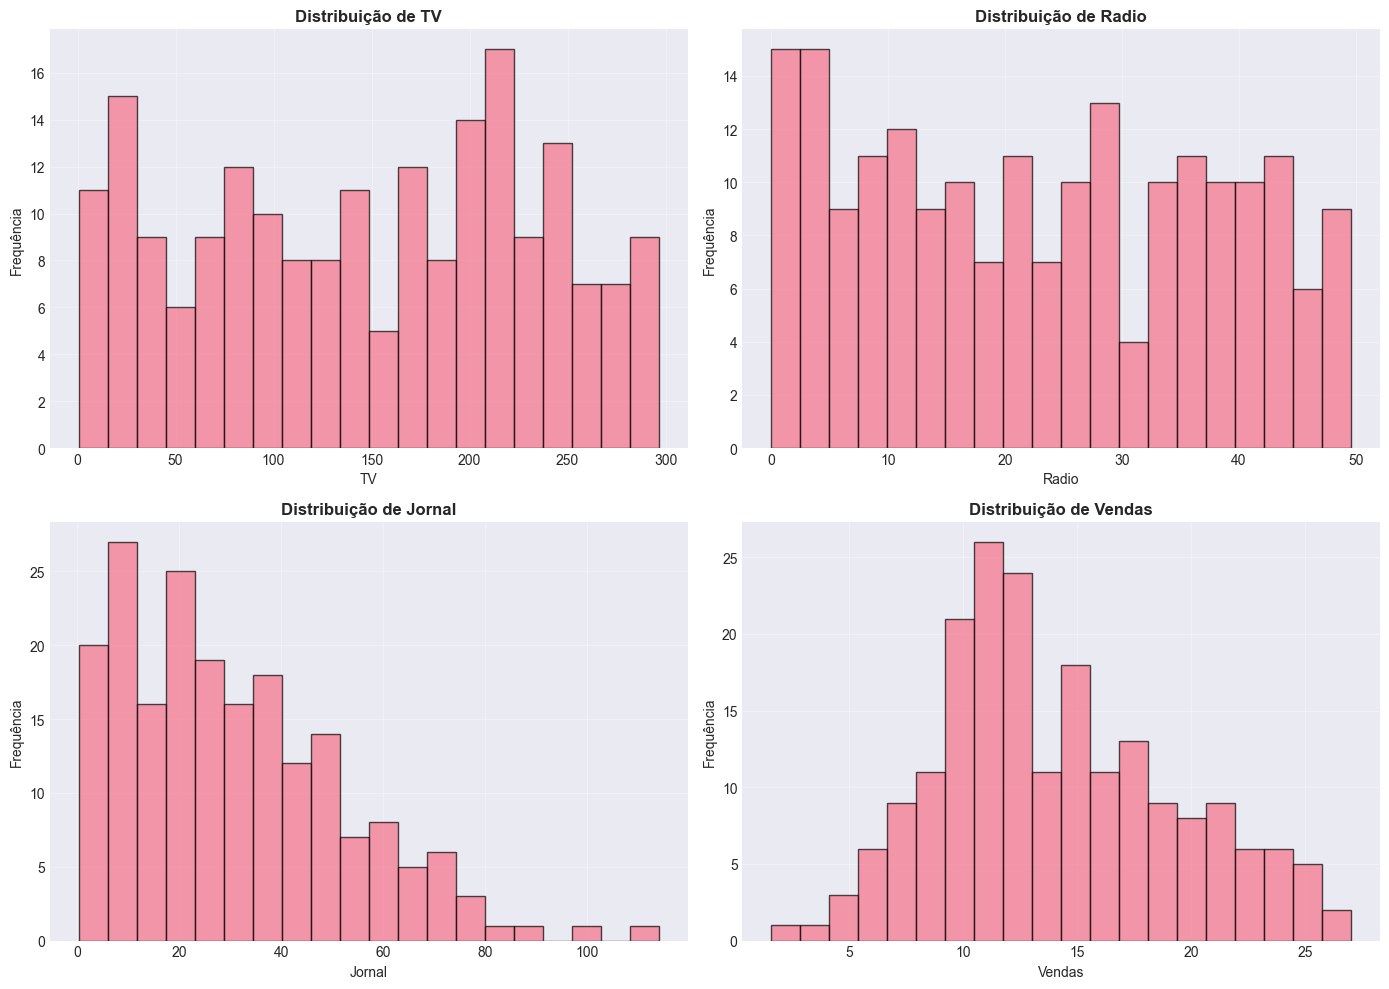

In [3]:
# Visualização da distribuição das variáveis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, col in enumerate(['TV', 'Radio', 'Jornal', 'Vendas']):
    axes[i].hist(dados[col], bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribuição de {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


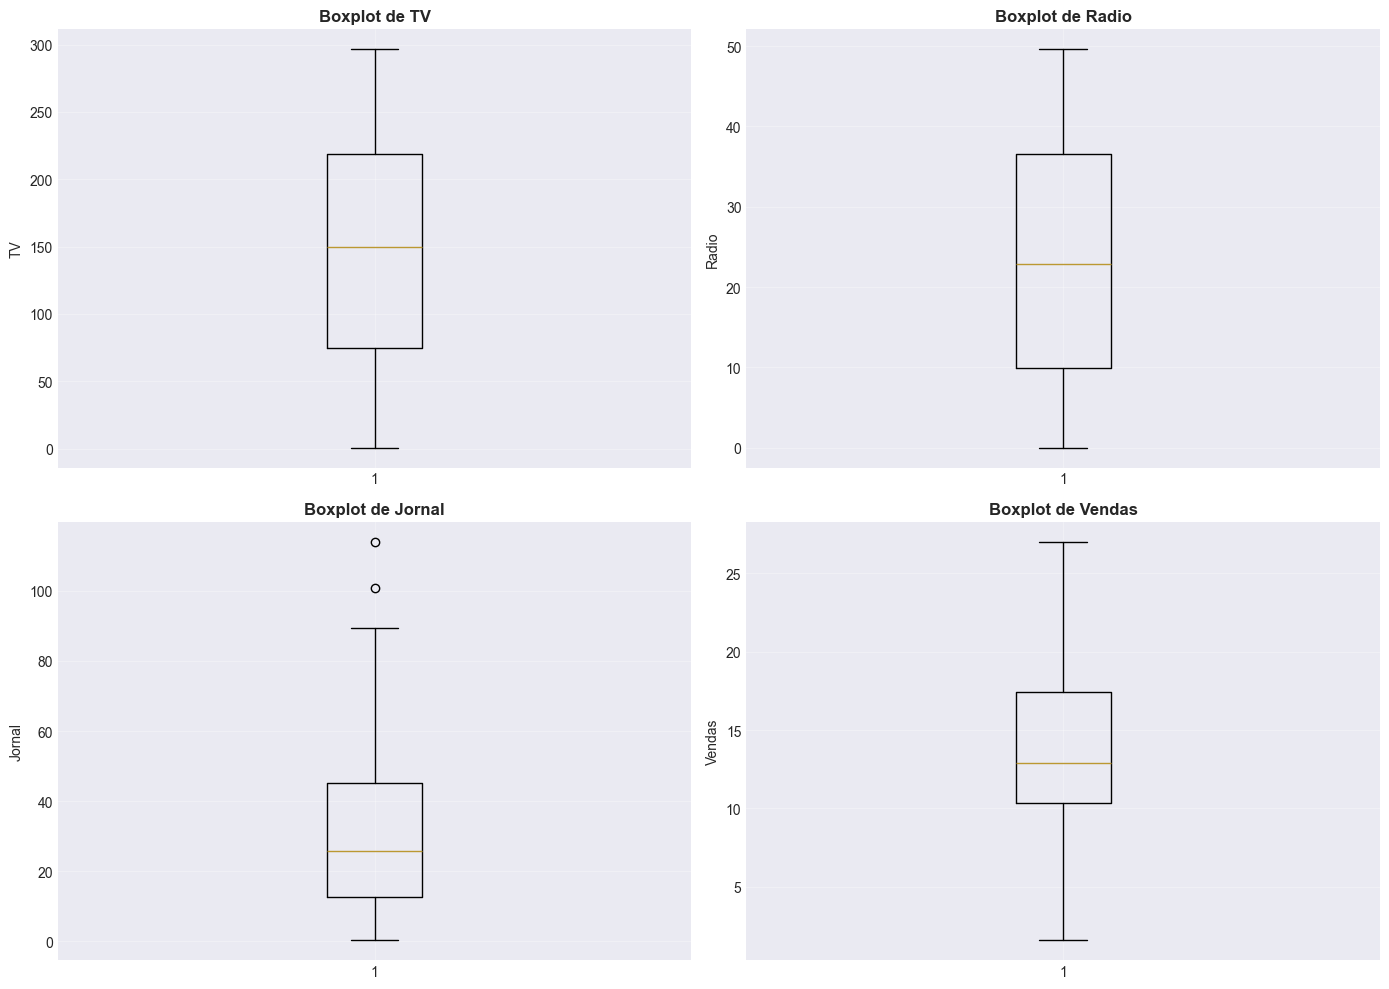

In [4]:
# Boxplots para identificar outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, col in enumerate(['TV', 'Radio', 'Jornal', 'Vendas']):
    axes[i].boxplot(dados[col], vert=True)
    axes[i].set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 2 - Cálculo de Correlação e Covariância


In [5]:
# Matriz de correlação
correlacao = dados[['TV', 'Radio', 'Jornal', 'Vendas']].corr()
print("Matriz de Correlação:")
print(correlacao)
print("\n" + "="*60)


Matriz de Correlação:
              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.782224
Radio   0.054809  1.000000  0.354104  0.576223
Jornal  0.056648  0.354104  1.000000  0.228299
Vendas  0.782224  0.576223  0.228299  1.000000



In [6]:
# Matriz de covariância
covariancia = dados[['TV', 'Radio', 'Jornal', 'Vendas']].cov()
print("Matriz de Covariância:")
print(covariancia)


Matriz de Covariância:
                 TV       Radio      Jornal      Vendas
TV      7370.949893   69.862492  105.919452  350.390195
Radio     69.862492  220.427743  114.496979   44.635688
Jornal   105.919452  114.496979  474.308326   25.941392
Vendas   350.390195   44.635688   25.941392   27.221853


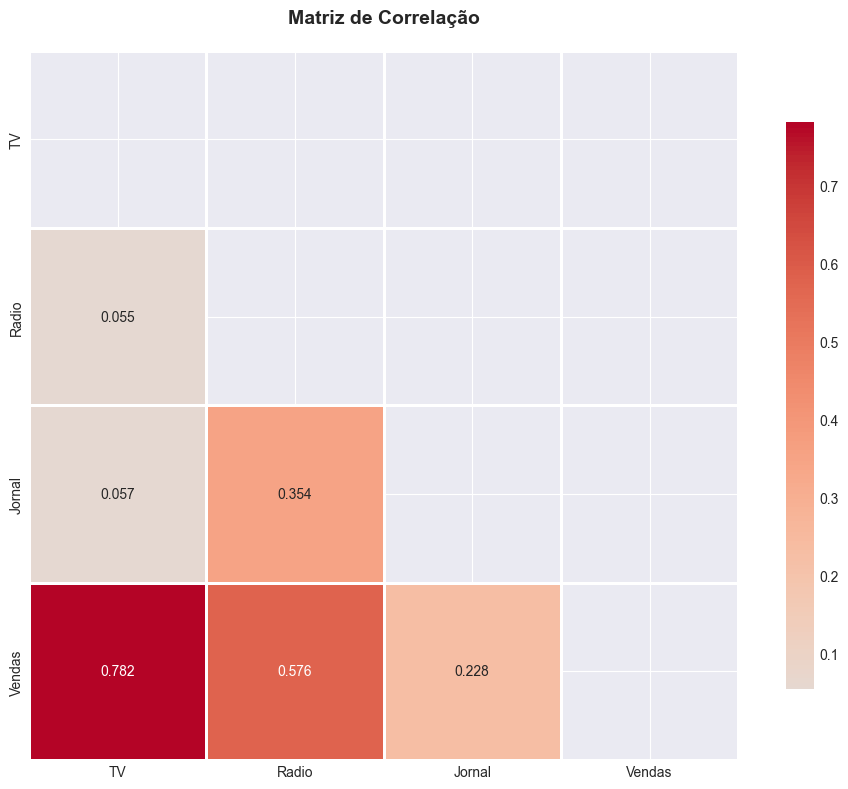

In [7]:
# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlacao, dtype=bool))
sns.heatmap(correlacao, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, mask=mask)
plt.title('Matriz de Correlação', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


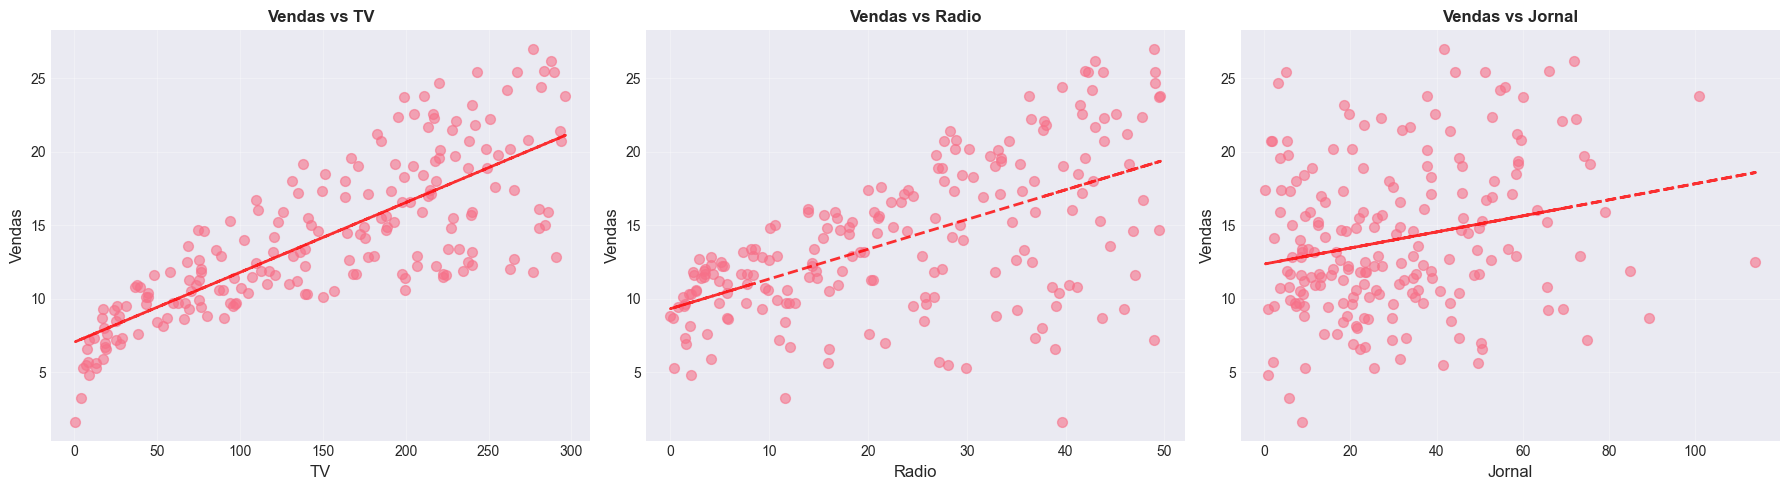

In [8]:
# Gráficos de dispersão entre variáveis explicativas e variável resposta
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, var in enumerate(['TV', 'Radio', 'Jornal']):
    axes[i].scatter(dados[var], dados['Vendas'], alpha=0.6, s=50)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Vendas', fontsize=12)
    axes[i].set_title(f'Vendas vs {var}', fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    
    # Adicionando linha de tendência
    z = np.polyfit(dados[var], dados['Vendas'], 1)
    p = np.poly1d(z)
    axes[i].plot(dados[var], p(dados[var]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()


## 3 - Modelo de Regressão Múltipla


In [9]:
# Preparando os dados para o modelo
X = dados[['TV', 'Radio', 'Jornal']]
y = dados['Vendas']

# Adicionando constante (intercepto)
X_const = sm.add_constant(X)


In [10]:
# Ajustando o modelo de regressão múltipla
modelo = sm.OLS(y, X_const).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           1.58e-96
Time:                        19:59:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [11]:
# Armazenando predições e resíduos para análises posteriores
dados['Predito'] = modelo.fittedvalues
dados['Residuos'] = modelo.resid
dados['Residuos_Padronizados'] = modelo.resid_pearson


## 4 - Análise de Resíduos


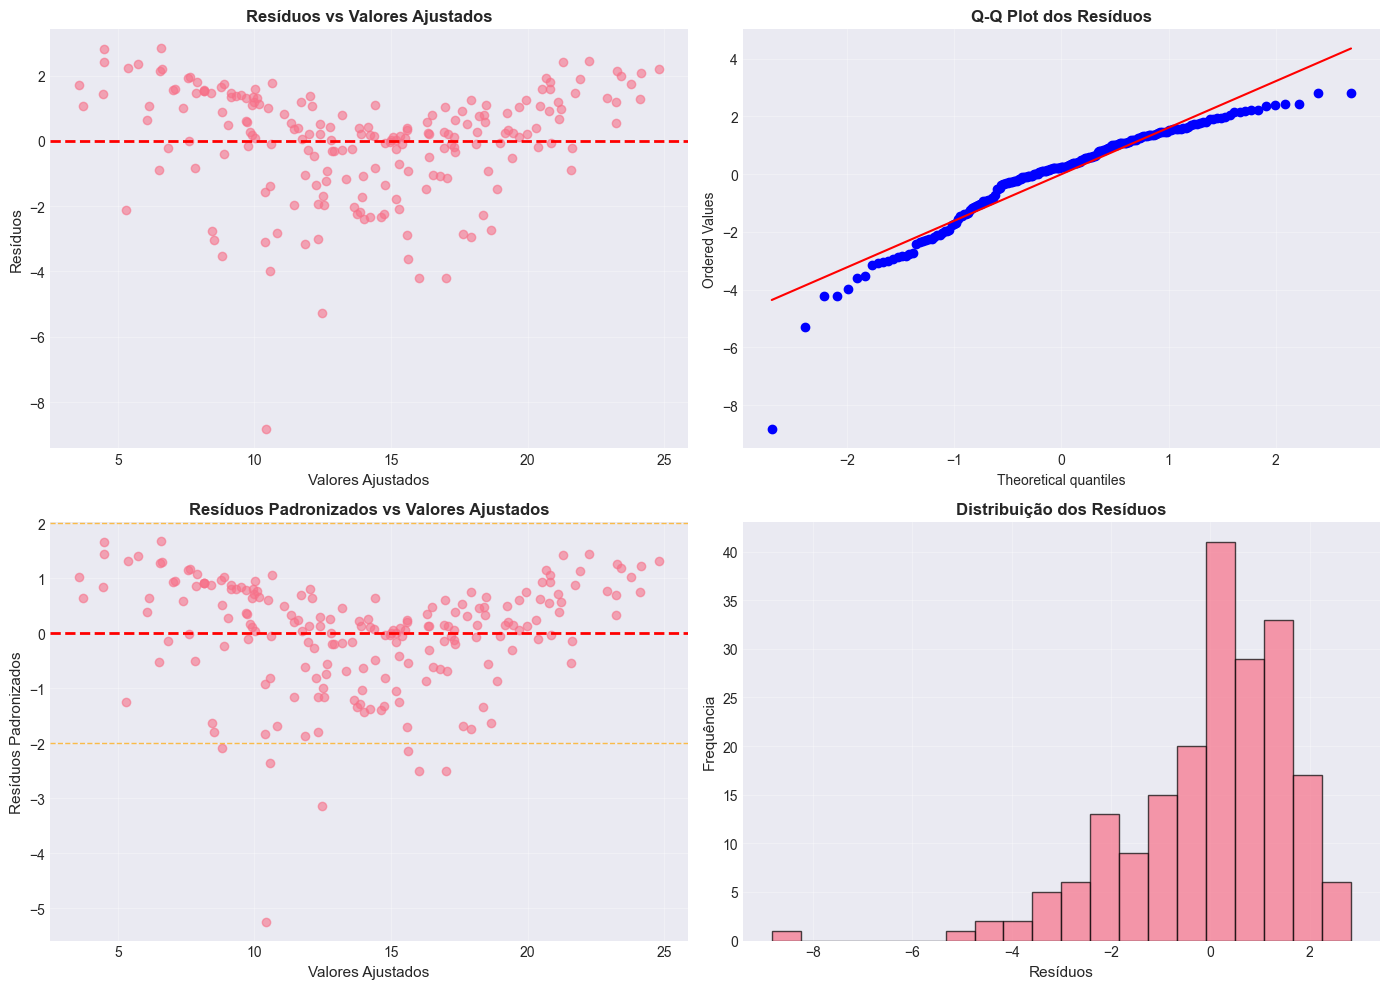

In [12]:
# Gráficos de diagnóstico de resíduos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Resíduos vs Valores Ajustados
axes[0, 0].scatter(dados['Predito'], dados['Residuos'], alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Valores Ajustados', fontsize=11)
axes[0, 0].set_ylabel('Resíduos', fontsize=11)
axes[0, 0].set_title('Resíduos vs Valores Ajustados', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# 2. Q-Q Plot para normalidade
stats.probplot(dados['Residuos'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot dos Resíduos', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Resíduos padronizados
axes[1, 0].scatter(dados['Predito'], dados['Residuos_Padronizados'], alpha=0.6)
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].axhline(y=2, color='orange', linestyle='--', linewidth=1, alpha=0.7)
axes[1, 0].axhline(y=-2, color='orange', linestyle='--', linewidth=1, alpha=0.7)
axes[1, 0].set_xlabel('Valores Ajustados', fontsize=11)
axes[1, 0].set_ylabel('Resíduos Padronizados', fontsize=11)
axes[1, 0].set_title('Resíduos Padronizados vs Valores Ajustados', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Histograma dos resíduos
axes[1, 1].hist(dados['Residuos'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Resíduos', fontsize=11)
axes[1, 1].set_ylabel('Frequência', fontsize=11)
axes[1, 1].set_title('Distribuição dos Resíduos', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [13]:
# Testes estatísticos para verificar as suposições do modelo

# 1. Teste de Normalidade - Lilliefors (Kolmogorov-Smirnov modificado)
stat_lilliefors, p_lilliefors = lilliefors(dados['Residuos'], dist='norm')
print("Teste de Normalidade (Lilliefors):")
print(f"Estatística: {stat_lilliefors:.4f}")
print(f"P-valor: {p_lilliefors:.4f}")
if p_lilliefors > 0.05:
    print("Não rejeitamos H0: Os resíduos seguem distribuição normal")
else:
    print("Rejeitamos H0: Os resíduos NÃO seguem distribuição normal")
print("\n" + "="*60 + "\n")

# 2. Teste de Homocedasticidade - Breusch-Pagan
bp_stat, bp_pval, _, _ = het_breuschpagan(dados['Residuos'], X_const)
print("Teste de Homocedasticidade (Breusch-Pagan):")
print(f"Estatística: {bp_stat:.4f}")
print(f"P-valor: {bp_pval:.4f}")
if bp_pval > 0.05:
    print("Não rejeitamos H0: Os resíduos são homocedásticos")
else:
    print("Rejeitamos H0: Os resíduos NÃO são homocedásticos (heterocedasticidade)")
print("\n" + "="*60 + "\n")

# 3. Teste de Normalidade - Shapiro-Wilk (para amostras pequenas/médias)
stat_shapiro, p_shapiro = stats.shapiro(dados['Residuos'])
print("Teste de Normalidade (Shapiro-Wilk):")
print(f"Estatística: {stat_shapiro:.4f}")
print(f"P-valor: {p_shapiro:.4f}")
if p_shapiro > 0.05:
    print("Não rejeitamos H0: Os resíduos seguem distribuição normal")
else:
    print("Rejeitamos H0: Os resíduos NÃO seguem distribuição normal")


Teste de Normalidade (Lilliefors):
Estatística: 0.1320
P-valor: 0.0010
Rejeitamos H0: Os resíduos NÃO seguem distribuição normal


Teste de Homocedasticidade (Breusch-Pagan):
Estatística: 5.1329
P-valor: 0.1623
Não rejeitamos H0: Os resíduos são homocedásticos


Teste de Normalidade (Shapiro-Wilk):
Estatística: 0.9177
P-valor: 0.0000
Rejeitamos H0: Os resíduos NÃO seguem distribuição normal


## 5 - Análise de Multicolinearidade


In [14]:
# Cálculo do VIF (Variance Inflation Factor) para cada variável
# VIF mede quanto a variância de um coeficiente de regressão aumenta devido à colinearidade
vif_data = pd.DataFrame()
vif_data["Variável"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Análise de Multicolinearidade - VIF (Variance Inflation Factor):")
print("="*60)
print(vif_data)
print("\nInterpretação:")
print("- VIF < 5: Multicolinearidade baixa (aceitável)")
print("- 5 ≤ VIF < 10: Multicolinearidade moderada (atenção)")
print("- VIF ≥ 10: Multicolinearidade alta (problema)")
print("\n" + "="*60)


Análise de Multicolinearidade - VIF (Variance Inflation Factor):
  Variável       VIF
0       TV  2.486772
1    Radio  3.285462
2   Jornal  3.055245

Interpretação:
- VIF < 5: Multicolinearidade baixa (aceitável)
- 5 ≤ VIF < 10: Multicolinearidade moderada (atenção)
- VIF ≥ 10: Multicolinearidade alta (problema)



In [15]:
# Análise da correlação entre variáveis explicativas
correlacao_explicativas = X.corr()
print("Correlação entre Variáveis Explicativas:")
print(correlacao_explicativas)
print("\n" + "="*60)
print("\nInterpretação:")
print("Correlações próximas de ±1 indicam alta multicolinearidade")


Correlação entre Variáveis Explicativas:
              TV     Radio    Jornal
TV      1.000000  0.054809  0.056648
Radio   0.054809  1.000000  0.354104
Jornal  0.056648  0.354104  1.000000


Interpretação:
Correlações próximas de ±1 indicam alta multicolinearidade


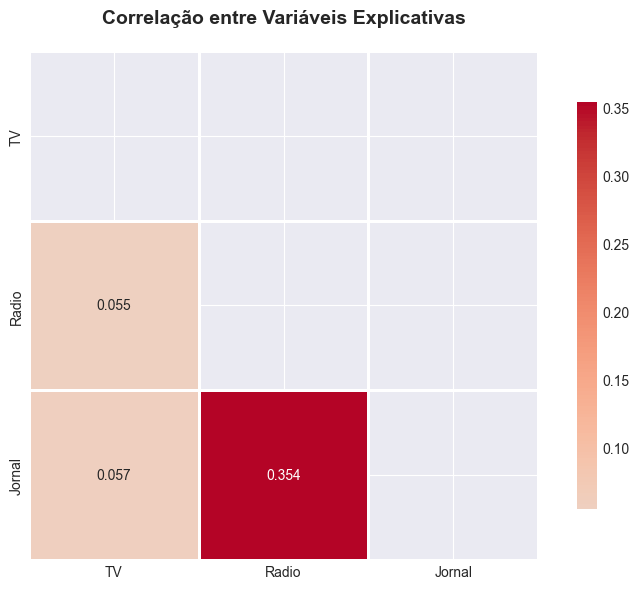

In [16]:
# Visualização da correlação entre variáveis explicativas
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(correlacao_explicativas, dtype=bool))
sns.heatmap(correlacao_explicativas, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, mask=mask,
            xticklabels=['TV', 'Radio', 'Jornal'], yticklabels=['TV', 'Radio', 'Jornal'])
plt.title('Correlação entre Variáveis Explicativas', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


## 6 - Análise do Modelo


In [17]:
# Extraindo métricas importantes do modelo
print("="*70)
print("MÉTRICAS DO MODELO")
print("="*70)
print(f"\nR² (R-squared): {modelo.rsquared:.4f}")
print(f"R² Ajustado (Adjusted R-squared): {modelo.rsquared_adj:.4f}")
print(f"F-statistic: {modelo.fvalue:.4f}")
print(f"Prob (F-statistic): {modelo.f_pvalue:.6f}")
print(f"AIC (Akaike Information Criterion): {modelo.aic:.4f}")
print(f"BIC (Bayesian Information Criterion): {modelo.bic:.4f}")
print(f"\nRMSE (Root Mean Squared Error): {np.sqrt(modelo.mse_resid):.4f}")
print(f"MSE (Mean Squared Error): {modelo.mse_resid:.4f}")
print("\n" + "="*70)


MÉTRICAS DO MODELO

R² (R-squared): 0.8972
R² Ajustado (Adjusted R-squared): 0.8956
F-statistic: 570.2707
Prob (F-statistic): 0.000000
AIC (Akaike Information Criterion): 780.3622
BIC (Bayesian Information Criterion): 793.5555

RMSE (Root Mean Squared Error): 1.6855
MSE (Mean Squared Error): 2.8409



In [18]:
# Coeficientes do modelo
print("\nCOEFICIENTES DO MODELO:")
print("="*70)
coeficientes = pd.DataFrame({
    'Coeficiente': modelo.params,
    'Erro Padrão': modelo.bse,
    't': modelo.tvalues,
    'P>|t|': modelo.pvalues,
    'IC [0.025]': modelo.conf_int()[0],
    'IC [0.975]': modelo.conf_int()[1]
})
print(coeficientes.round(4))
print("\n" + "="*70)



COEFICIENTES DO MODELO:
        Coeficiente  Erro Padrão        t   P>|t|  IC [0.025]  IC [0.975]
const        2.9389       0.3119   9.4223  0.0000      2.3238      3.5540
TV           0.0458       0.0014  32.8086  0.0000      0.0430      0.0485
Radio        0.1885       0.0086  21.8935  0.0000      0.1715      0.2055
Jornal      -0.0010       0.0059  -0.1767  0.8599     -0.0126      0.0105



In [19]:
# Interpretação dos coeficientes
print("\nINTERPRETAÇÃO DOS COEFICIENTES:")
print("="*70)
print(f"\nIntercepto (β₀): {modelo.params['const']:.4f}")
print("Interpretação: Valor esperado de Vendas quando todos os investimentos são zero.")
print("\n" + "-"*70)

for var in ['TV', 'Radio', 'Jornal']:
    coef = modelo.params[var]
    pval = modelo.pvalues[var]
    sig = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else ""
    print(f"\n{var} (β_{var.lower()}): {coef:.4f} {sig}")
    print(f"Interpretação: Mantendo as outras variáveis constantes, um aumento de 1 unidade")
    print(f"              em {var} resulta em um aumento de {coef:.4f} unidades em Vendas.")
    print(f"P-valor: {pval:.6f} {'(Significativo)' if pval < 0.05 else '(Não significativo)'}")
    print("-"*70)
print("\n" + "="*70)



INTERPRETAÇÃO DOS COEFICIENTES:

Intercepto (β₀): 2.9389
Interpretação: Valor esperado de Vendas quando todos os investimentos são zero.

----------------------------------------------------------------------

TV (β_tv): 0.0458 ***
Interpretação: Mantendo as outras variáveis constantes, um aumento de 1 unidade
              em TV resulta em um aumento de 0.0458 unidades em Vendas.
P-valor: 0.000000 (Significativo)
----------------------------------------------------------------------

Radio (β_radio): 0.1885 ***
Interpretação: Mantendo as outras variáveis constantes, um aumento de 1 unidade
              em Radio resulta em um aumento de 0.1885 unidades em Vendas.
P-valor: 0.000000 (Significativo)
----------------------------------------------------------------------

Jornal (β_jornal): -0.0010 
Interpretação: Mantendo as outras variáveis constantes, um aumento de 1 unidade
              em Jornal resulta em um aumento de -0.0010 unidades em Vendas.
P-valor: 0.859915 (Não significativ

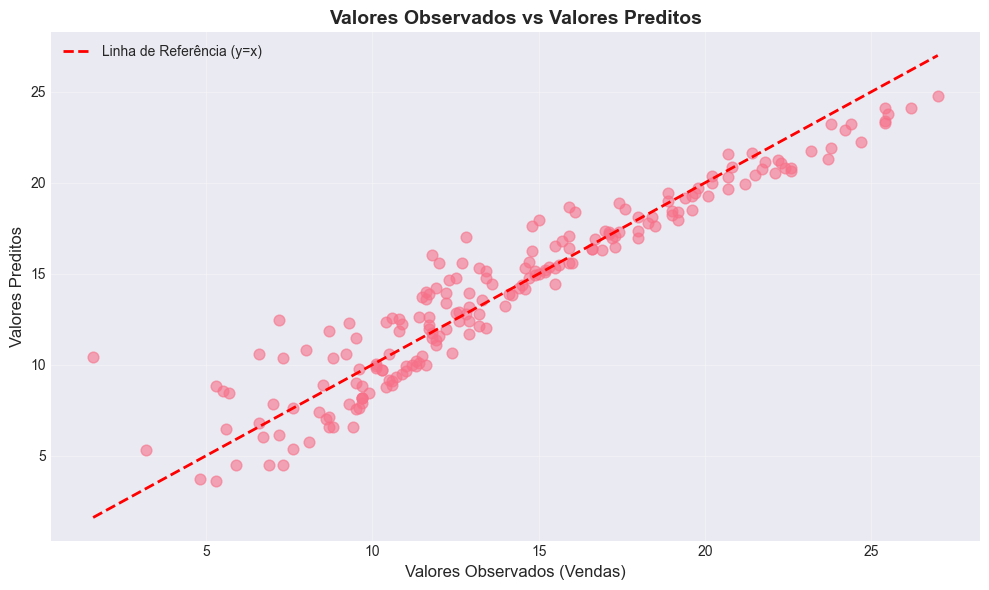

In [20]:
# Gráfico: Valores Observados vs Valores Preditos
plt.figure(figsize=(10, 6))
plt.scatter(dados['Vendas'], dados['Predito'], alpha=0.6, s=60)
plt.plot([dados['Vendas'].min(), dados['Vendas'].max()], 
         [dados['Vendas'].min(), dados['Vendas'].max()], 
         'r--', linewidth=2, label='Linha de Referência (y=x)')
plt.xlabel('Valores Observados (Vendas)', fontsize=12)
plt.ylabel('Valores Preditos', fontsize=12)
plt.title('Valores Observados vs Valores Preditos', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [21]:
# Resumo final da qualidade do modelo
print("\n" + "="*70)
print("RESUMO DA QUALIDADE DO MODELO")
print("="*70)
print(f"\n1. R² = {modelo.rsquared:.4f} ({modelo.rsquared*100:.2f}%)")
print("   → O modelo explica {:.2f}% da variabilidade nas vendas.".format(modelo.rsquared*100))

print(f"\n2. R² Ajustado = {modelo.rsquared_adj:.4f} ({modelo.rsquared_adj*100:.2f}%)")
print("   → R² ajustado penaliza a adição de variáveis não significativas.")

print(f"\n3. Teste F: F = {modelo.fvalue:.4f}, p = {modelo.f_pvalue:.6f}")
if modelo.f_pvalue < 0.05:
    print("   → O modelo é estatisticamente significativo (p < 0.05)")
else:
    print("   → O modelo NÃO é estatisticamente significativo (p ≥ 0.05)")

print(f"\n4. Multicolinearidade:")
for idx, row in vif_data.iterrows():
    status = "OK" if row['VIF'] < 5 else "ATENÇÃO" if row['VIF'] < 10 else "PROBLEMA"
    print(f"   → {row['Variável']}: VIF = {row['VIF']:.2f} ({status})")

print(f"\n5. Pressupostos:")
print(f"   → Normalidade dos resíduos: {'OK' if p_lilliefors > 0.05 else 'VIOLADO'}")
print(f"   → Homocedasticidade: {'OK' if bp_pval > 0.05 else 'VIOLADO'}")

print("\n" + "="*70)



RESUMO DA QUALIDADE DO MODELO

1. R² = 0.8972 (89.72%)
   → O modelo explica 89.72% da variabilidade nas vendas.

2. R² Ajustado = 0.8956 (89.56%)
   → R² ajustado penaliza a adição de variáveis não significativas.

3. Teste F: F = 570.2707, p = 0.000000
   → O modelo é estatisticamente significativo (p < 0.05)

4. Multicolinearidade:
   → TV: VIF = 2.49 (OK)
   → Radio: VIF = 3.29 (OK)
   → Jornal: VIF = 3.06 (OK)

5. Pressupostos:
   → Normalidade dos resíduos: VIOLADO
   → Homocedasticidade: OK



### Conclusões

O modelo de regressão múltipla foi ajustado com sucesso. As principais conclusões são:

1. **Variáveis Significativas**: Identificar quais variáveis têm efeito significativo sobre as vendas
2. **Qualidade do Ajuste**: O R² indica o percentual de variabilidade explicada pelo modelo
3. **Multicolinearidade**: Verificada através do VIF e correlações
4. **Pressupostos**: Normalidade e homocedasticidade dos resíduos foram testados
5. **Predições**: O modelo pode ser usado para predizer vendas com base nos investimentos em propaganda
